In [220]:
# importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler    


In [179]:
#Datasets
loan=pd.read_csv('bankloan.csv')

In [180]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [181]:
loan.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [182]:
loan.shape

(614, 13)

In [183]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [184]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [185]:
loan.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


Checking values of different columns

In [186]:
loan['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [187]:
loan['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [188]:
loan['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [189]:
#Checking Null Values
nullv=loan.isnull().sum()
print(nullv)
print("\nTotal Null Values: ",nullv.sum())


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Total Null Values:  149


In [190]:
#Imputing Missing values with mean for continuous variable
loan['LoanAmount'].fillna(loan['LoanAmount'].mean(), inplace=True)
loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mean(), inplace=True)
loan['ApplicantIncome'].fillna(loan['ApplicantIncome'].mean(), inplace=True)
loan['CoapplicantIncome'].fillna(loan['CoapplicantIncome'].mean(), inplace=True)

#Imputing Missing values with mode for categorical variables
loan['Gender'].fillna(loan['Gender'].mode()[0], inplace=True)
loan['Married'].fillna(loan['Married'].mode()[0], inplace=True)
loan['Dependents'].fillna(loan['Dependents'].mode()[0], inplace=True)
loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0], inplace=True)
loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mode()[0], inplace=True)
loan['Credit_History'].fillna(loan['Credit_History'].mode()[0], inplace=True)

In [191]:
loan.shape

(614, 13)

### Data Visualizations

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

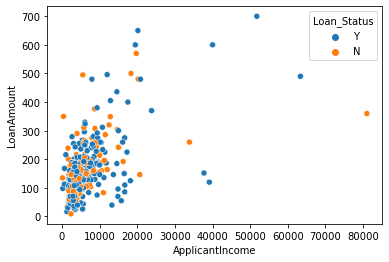

In [192]:
sns.scatterplot(y='LoanAmount',x='ApplicantIncome',hue='Loan_Status',data=loan)

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='LoanAmount'>

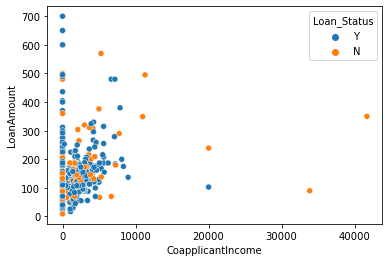

In [193]:
sns.scatterplot(y='LoanAmount',x='CoapplicantIncome',hue='Loan_Status',data=loan)

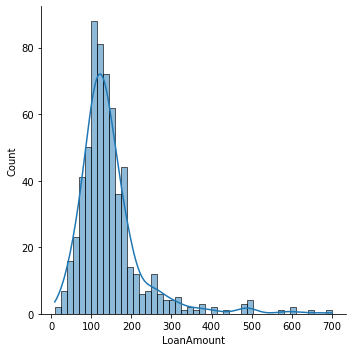

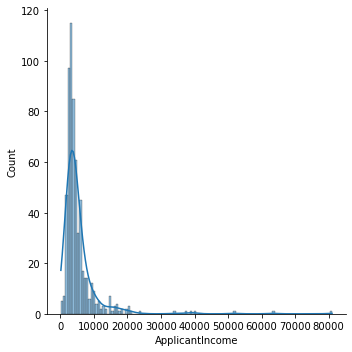

In [194]:
sns.displot(x='LoanAmount',data= loan, kde=True)
sns.displot(x='ApplicantIncome',data= loan, kde=True)

<Figure size 1152x1080 with 0 Axes>

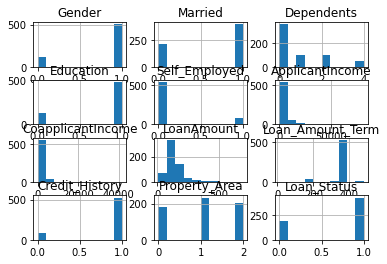

In [225]:
plt.figure(figsize=(16,15))
loan.hist();

<AxesSubplot:xlabel='Gender', ylabel='count'>

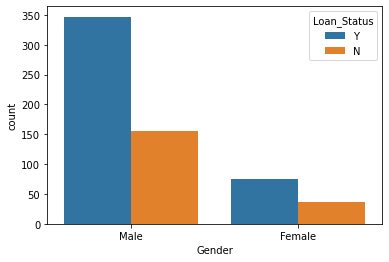

In [196]:
sns.countplot(x='Gender',hue='Loan_Status',data=loan)


<AxesSubplot:xlabel='Married', ylabel='count'>

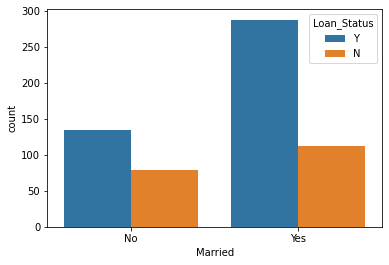

In [197]:
sns.countplot(x='Married',hue='Loan_Status',data=loan)


<AxesSubplot:>

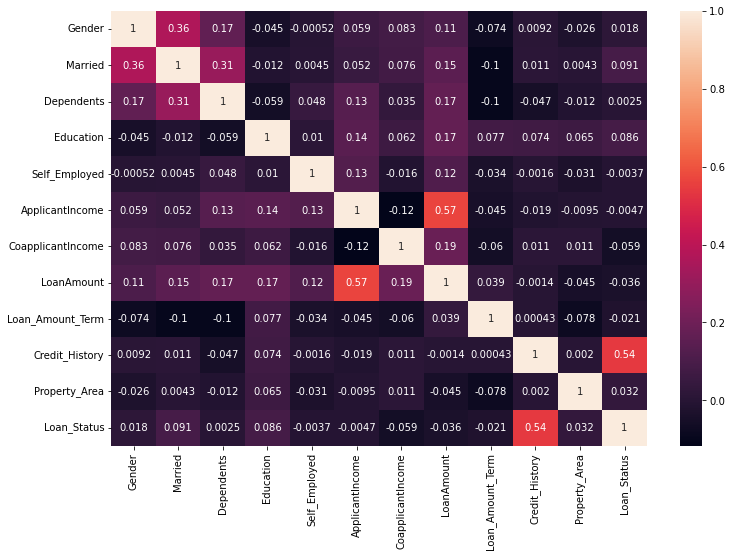

In [221]:
# Correlation
plt.figure(figsize=(12,8))
corr=loan.corr()
sns.heatmap(corr,annot=True)

In [198]:
# convert categorical columns to numerical values
loan = loan.replace(to_replace='3+', value=4)

loan.replace({'Loan_Status':{'N':0,'Y':1},'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [199]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


In [200]:
loan['Dependents']=loan['Dependents'].astype(int)

In [201]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int32(1), int64(7), object(1)
memory usage: 60.1+ KB


Seprating Data and Label

In [202]:
X=loan.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y=loan['Loan_Status']

In [203]:
print('X= ',X.shape)
print('y= ',y.shape)

X=  (614, 11)
y=  (614,)


In [204]:
# Splitting data into train test split

In [205]:
X_train, X_test, Y_train, Y_test= train_test_split(X,y,test_size=0.1,stratify=y)

In [206]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(552, 11) (62, 11) (552,) (62,)


In [207]:
scale= StandardScaler()  
X_train= scale.fit_transform(X_train)    
X_test= scale.transform(X_test)  

Traning the Mode using SVM

In [208]:
classifier= svm.SVC(kernel='linear')

In [209]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [210]:
X_train_pred=classifier.predict(X_train)
Train_Accu=accuracy_score(X_train_pred,Y_train)

In [211]:
print('Accuracy: ',Train_Accu )

Accuracy:  0.8097826086956522


In [212]:
X_test_pred=classifier.predict(X_test)
Test_Accu=accuracy_score(X_test_pred,Y_test)

In [213]:
print('Accuracy: ',Test_Accu )

Accuracy:  0.8064516129032258
